# First AI application using Transfer Learning in 6 Steps!

<img src='images/12/ai_6steps.png'>

## Download the dataset 
- Download the cats vs dogs dataset from this link and unzip the file: https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

## Load the downloaded dataset into Python

In [1]:
# Import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
# Data from Train folder
train_data_location = os.path.join('..','data', 'cats_and_dogs_filtered', 'train')
train_data = ImageDataGenerator().flow_from_directory(train_data_location)

# Data from Validation folder
validation_data_location = os.path.join('..','data', 'cats_and_dogs_filtered', 'validation')
validation_data = ImageDataGenerator().flow_from_directory(validation_data_location)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
# Check the output mappings
animal_mappings = train_data.class_indices
print(f'The animal mappings are {animal_mappings}')

The animal mappings are {'cats': 0, 'dogs': 1}


## Download the pre-trained model

In [4]:
# Import the necessary package
from tensorflow.keras.applications import ResNet50

In [5]:
# Import the desired pre-trained model
# List of pre-trained models: https://www.tensorflow.org/api_docs/python/tf/keras/applications
pre_trained_model = ResNet50(include_top=False)

In [6]:
# Freeze the model so we don't accidentally change the pre-trained model
pre_trained_model.trainable = False

## Modify the pre-trained model to suit our dataset

In [7]:
# Import the necessary packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense

In [8]:
# To create a model for our needs, first create a blank model
model = Sequential()

# Then add the pre-trained model to use Transfer Learning
model.add(pre_trained_model)

# Finally add our custom modifications
model.add(GlobalAveragePooling2D())
model.add(Dense(len(animal_mappings), activation='softmax'))

In [9]:
# Make the model ready for training
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# If you want to check the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


## Training the model on your dataset

In [11]:
# Train the model for 15 rounds. Each round is called an "epoch"
training_history = model.fit(train_data, epochs=15, validation_data=validation_data)

Epoch 1/15
63/63 [==============================] - 326s 5s/step - loss: 0.2399 - accuracy: 0.9085 - val_loss: 0.0956 - val_accuracy: 0.9720
Epoch 2/15
63/63 [==============================] - 326s 5s/step - loss: 0.0623 - accuracy: 0.9785 - val_loss: 0.0724 - val_accuracy: 0.9750
Epoch 3/15
63/63 [==============================] - 327s 5s/step - loss: 0.0460 - accuracy: 0.9820 - val_loss: 0.0960 - val_accuracy: 0.9710
Epoch 4/15
63/63 [==============================] - 333s 5s/step - loss: 0.0356 - accuracy: 0.9865 - val_loss: 0.0701 - val_accuracy: 0.9770
Epoch 5/15
63/63 [==============================] - 327s 5s/step - loss: 0.0230 - accuracy: 0.9935 - val_loss: 0.0655 - val_accuracy: 0.9760
Epoch 6/15
63/63 [==============================] - 308s 5s/step - loss: 0.0180 - accuracy: 0.9955 - val_loss: 0.0698 - val_accuracy: 0.9750
Epoch 7/15
63/63 [==============================] - 294s 5s/step - loss: 0.0171 - accuracy: 0.9940 - val_loss: 0.0719 - val_accuracy: 0.9750
Epoch 8/15
63

In [12]:
# Save the trained model to a file for future use
model.save(os.path.join('..', 'models', 'cats_vs_dogs.h5'))

### Plotting the training losses

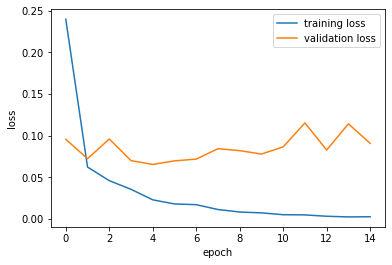

In [13]:
# Import the necessary package
import matplotlib.pyplot as plt

# Plot the Training and Validation losses over each epoch
plt.plot(training_history.history['loss'], label='training loss')
plt.plot(training_history.history['val_loss'], label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## Using the model for predictions

In [14]:
# Import the necessary packages
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

In [15]:
# Load the model file into Python
model = load_model(os.path.join('..', 'models', 'cats_vs_dogs.h5'))

In [22]:
# Load the image into Python
test_image = image.load_img(os.path.join('images', 'test', 'test1.jpg'))

# Convert the image to a matrix of numbers
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

In [23]:
# Make predictions
result = model.predict(test_image)
print(result)

[[1.3967433e-10 1.0000000e+00]]


In [24]:
# Convert the number predictions to the actual name. The class mappings are {'cats': 0, 'dogs': 1}.
# The model predictions are actually the probability of the image belonging to each class.

# To find the element with the highest value, we use numpy's argmax function
predicted_class = np.argmax(result)

if predicted_class == 0:
    print('Cat')
elif predicted_class == 1:
    print('Dog')

Dog
